In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [4]:
#from IPython.display import SVG, display, HTML
#style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
#HTML(style)

In [5]:
titanic_data = pd.read_csv('data/train.csv')

In [6]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=True)
Y = titanic_data.Survived

In [8]:
X = pd.get_dummies(X)

In [9]:
X = X.fillna({'Age': X.Age.median()})

In [10]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
#graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
#display(SVG(graph.pipe(format='svg')))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
clf.score(X, Y)

0.8226711560044894

In [33]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
715,3,19.0,0,0,7.6500,0,1,0,0,1
525,3,40.5,0,0,7.7500,0,1,0,1,0
381,3,1.0,0,2,15.7417,1,0,1,0,0
140,3,28.0,0,2,15.2458,1,0,1,0,0


In [18]:
max_depth_value = range(1, 20)

In [19]:
scores_data = pd.DataFrame()

In [20]:
for max_depth in max_depth_value:
    clf = clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [21]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.798711


In [22]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], 
                          var_name='set_type', value_name='score')

In [23]:
scores_data_long[scores_data_long.set_type == 'cross_val_score']

,max_depth,set_type,score
38,1,cross_val_score,0.781961
39,2,cross_val_score,0.770196
40,3,cross_val_score,0.790322
41,4,cross_val_score,0.788627
42,5,cross_val_score,0.798711
43,6,cross_val_score,0.805434
44,7,cross_val_score,0.798697
45,8,cross_val_score,0.797003
46,9,cross_val_score,0.800350
47,10,cross_val_score,0.798669


In [24]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


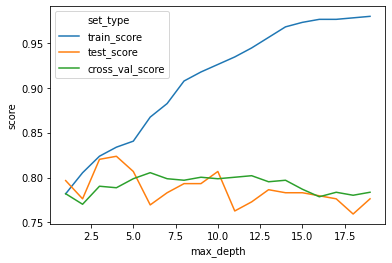

In [25]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [26]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [31]:
cross_val_score(best_clf, X_test, Y_test, cv=5).mean()

0.7864406779661017

In [28]:
best_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [29]:
best_clf.score(X_test, Y_test)

0.7627118644067796